**Grupo**

Giulia Guglielmo

Sofia Wrobel

Thais Lagoas

## **Cluster Analysis**



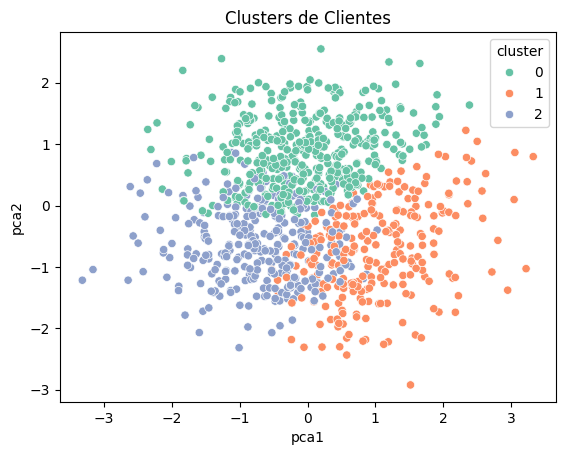


Diagnóstico por Cluster:

Cluster 0:
Tipo de Cliente: Cliente inativo
Frequência média de compras: 9.02
Gasto total médio: 4937.41
Dias desde última compra (média): 275.79

Cluster 1:
Tipo de Cliente: Cliente fiel e de alto valor
Frequência média de compras: 13.83
Gasto total médio: 5530.32
Dias desde última compra (média): 148.54

Cluster 2:
Tipo de Cliente: Cliente de valor médio e recorrência moderada
Frequência média de compras: 8.25
Gasto total médio: 4499.12
Dias desde última compra (média): 88.45

Head da tabela de transações:
   Unnamed: 0  transacao_id  cliente_id data_compra  valor_compra  \
0           0             1         398  2022-01-01           161   
1           1             2         583  2022-01-02           116   
2           2             3         726  2022-01-03           173   
3           3             4         435  2022-01-04           148   
4           4             5         577  2022-01-05            21   

  meio_pagamento        campanha  idade  ren

In [42]:
# Importação das bibliotecas necessárias
import pandas as pd  # Para manipulação de dados em DataFrames
import numpy as np  # Para operações numéricas
import matplotlib.pyplot as plt  # Para visualização de dados (gráficos)
import seaborn as sns  # Biblioteca de visualização baseada em matplotlib, com gráficos mais bonitos
from sklearn.preprocessing import StandardScaler  # Para padronizar os dados antes da clusterização
from sklearn.cluster import KMeans  # Algoritmo de clusterização
from sklearn.decomposition import PCA  # Para redução de dimensionalidade (visualização dos clusters)
from sklearn.linear_model import LinearRegression  # (Não foi usado neste código, mas serve para regressão linear)

# Etapa 2: Carregamento dos dados
transacoes = pd.read_csv('/content/Transa__es_Completas.csv')  # Carrega o CSV com os dados de transações
campanhas = pd.read_csv('/content/campanhas.csv')  # Carrega o CSV com os dados de campanhas

# Etapa 3: Clusterização de Clientes
# Agrupamento dos dados por cliente_id e cálculo dos valores máximos para cada cliente
clientes = transacoes.groupby('cliente_id').agg({
    'frequencia_compras': 'max',  # Frequência de compras do cliente
    'total_gasto': 'max',         # Total gasto pelo cliente
    'ultima_compra': 'max'        # Dias desde a última compra
}).reset_index()  # Reseta o índice para manter o DataFrame organizado

# Padronização dos dados numéricos (necessária para o KMeans funcionar corretamente)
scaler = StandardScaler()
clientes_scaled = scaler.fit_transform(clientes[['frequencia_compras', 'total_gasto', 'ultima_compra']])

# Aplicação do algoritmo KMeans com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clientes['cluster'] = kmeans.fit_predict(clientes_scaled)  # Adiciona o cluster correspondente a cada cliente

# Junta a informação dos clusters de volta ao DataFrame original de transações
transacoes = pd.merge(transacoes, clientes[['cliente_id', 'cluster']], on='cliente_id', how='left')

# Redução de dimensionalidade para visualização (2 componentes principais)
pca = PCA(n_components=2)
clientes[['pca1', 'pca2']] = pca.fit_transform(clientes_scaled)  # Adiciona colunas de coordenadas PCA ao DataFrame

# Visualização dos clusters usando gráfico de dispersão
sns.scatterplot(data=clientes, x='pca1', y='pca2', hue='cluster', palette='Set2')
plt.title('Clusters de Clientes')
plt.show()

# Diagnóstico dos clusters (perfil médio dos clientes por cluster)
cluster_diagnostico = clientes.groupby('cluster')[['frequencia_compras', 'total_gasto', 'ultima_compra']].mean().round(2)

# Impressão dos perfis dos clusters
print("\nDiagnóstico por Cluster:")
for idx, row in cluster_diagnostico.iterrows():
    print(f"\nCluster {idx}:")
    # Classificação de tipo de cliente com base em regras simples
    if row['frequencia_compras'] > 12 and row['total_gasto'] > 5000:
        print("Tipo de Cliente: Cliente fiel e de alto valor")
    elif row['ultima_compra'] > 250:
        print("Tipo de Cliente: Cliente inativo")
    else:
        print("Tipo de Cliente: Cliente de valor médio e recorrência moderada")

    # Exibição dos valores médios por cluster
    print(f"Frequência média de compras: {row['frequencia_compras']}")
    print(f"Gasto total médio: {row['total_gasto']}")
    print(f"Dias desde última compra (média): {row['ultima_compra']}")

# Exibição das primeiras e últimas linhas do DataFrame de transações atualizado
print("\nHead da tabela de transações:")
print(transacoes.head())  # Mostra as 5 primeiras linhas

print("\nTail da tabela de transações:")
print(transacoes.tail())  # Mostra as 5 últimas linhas


**Explicacao do codigo**

*0 (verde)	Médio valor / comportamento variado	Personalização de conteúdo ou experimentação de campanhas novas

1 (laranja)	Provavelmente mais rentáveis e fiéis	Ofertas VIP, programas de fidelidade, early access

2 (azul)	Clientes inativos ou de baixo valor	Campanhas de reativação, cupons agressivos, e-mail marketing*

Esse código realiza uma análise de segmentação de clientes com base em suas transações. Primeiro, ele carrega os dados de compras e campanhas, depois agrupa os clientes considerando frequência de compras, total gasto e tempo desde a última compra. Esses dados são padronizados e usados no algoritmo KMeans para criar três clusters distintos de clientes. Com isso, o código identifica perfis de comportamento, como "clientes fiéis e de alto valor", "clientes inativos" e "clientes de valor médio". A visualização dos clusters é feita com um gráfico de dispersão usando PCA, facilitando a interpretação dos agrupamentos. Por fim, ele imprime um diagnóstico médio de cada grupo e exibe os dados atualizados com os clusters atribuídos, oferecendo uma base clara para ações de marketing segmentadas.

# **Conjoint Analysis**



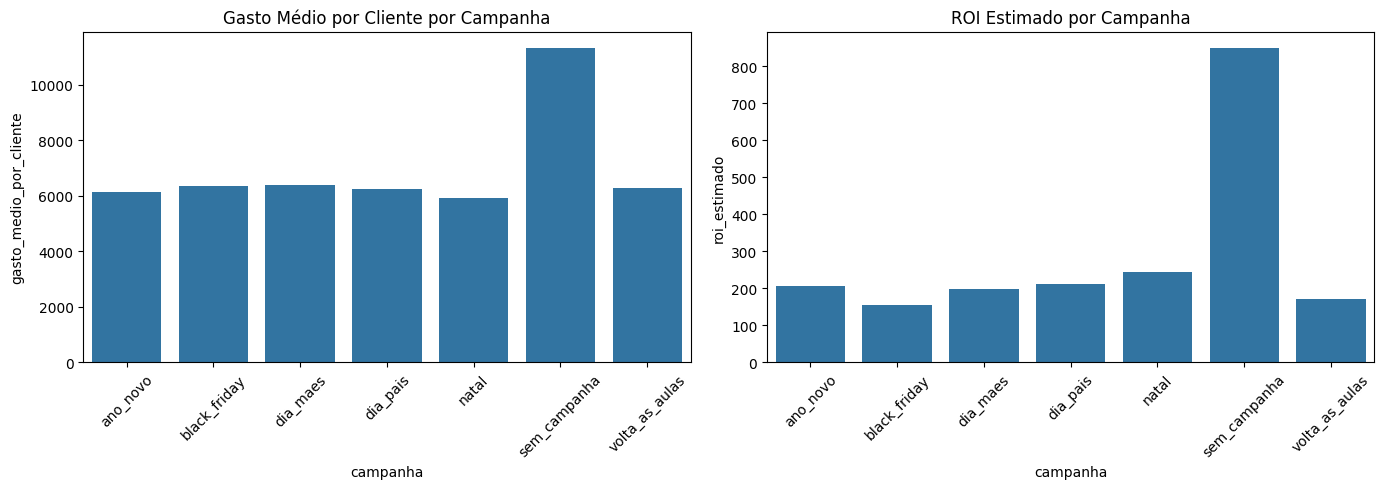

In [43]:
# Etapa 4: Conjoint Analysis (análise da preferência por campanhas)
# Agrupamento dos dados de transações por campanha, somando e contando indicadores relevantes
preferencia_campanhas = transacoes.groupby('campanha').agg({
    'cliente_id': 'nunique',         # Número único de clientes impactados por campanha
    'valor_compra': 'sum',           # Valor total das compras feitas durante a campanha
    'frequencia_compras': 'sum',     # Soma da frequência de compras por campanha
    'total_gasto': 'sum'             # Soma total de gastos por campanha
}).reset_index()

# Junta com os dados adicionais da tabela de campanhas (ex: custo da campanha)
preferencia_campanhas = pd.merge(
    preferencia_campanhas,
    campanhas,
    left_on='campanha',
    right_on='nome_campanha',
    how='left'  # Garante que todas as campanhas presentes nas transações sejam mantidas
)

# Calcula o gasto médio por cliente em cada campanha
preferencia_campanhas['gasto_medio_por_cliente'] = (
    preferencia_campanhas['total_gasto'] / preferencia_campanhas['cliente_id']
)

# Calcula o ROI estimado de cada campanha (Retorno sobre Investimento)
preferencia_campanhas['roi_estimado'] = (
    preferencia_campanhas['total_gasto'] / preferencia_campanhas['custo_campanha']
)

# Visualização dos dados – Criação de dois gráficos lado a lado
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras para o gasto médio por cliente por campanha
sns.barplot(data=preferencia_campanhas, x='campanha', y='gasto_medio_por_cliente', ax=ax[0])
ax[0].set_title('Gasto Médio por Cliente por Campanha')
ax[0].tick_params(axis='x', rotation=45)

# Gráfico de barras para o ROI estimado de cada campanha
sns.barplot(data=preferencia_campanhas, x='campanha', y='roi_estimado', ax=ax[1])
ax[1].set_title('ROI Estimado por Campanha')
ax[1].tick_params(axis='x', rotation=45)

# Ajusta o layout dos gráficos para não sobrepor elementos
plt.tight_layout()
plt.show()

**Explicação do Resultado do Código**

Este código realiza uma análise conjunta (conjoint analysis) para entender a performance de diferentes campanhas de marketing com base nas transações dos clientes. Ele calcula quantos clientes únicos cada campanha alcançou, quanto foi gasto no total, e qual foi o valor médio gasto por cliente. Em seguida, cruza essas informações com o custo de cada campanha para calcular o ROI estimado (retorno sobre investimento). Por fim, exibe dois gráficos comparativos: um mostra o gasto médio por cliente em cada campanha e o outro apresenta o ROI. Essa análise permite identificar quais campanhas foram mais eficientes em gerar valor e retorno financeiro, orientando futuras decisões de investimento em marketing.

# **Linear Regression**

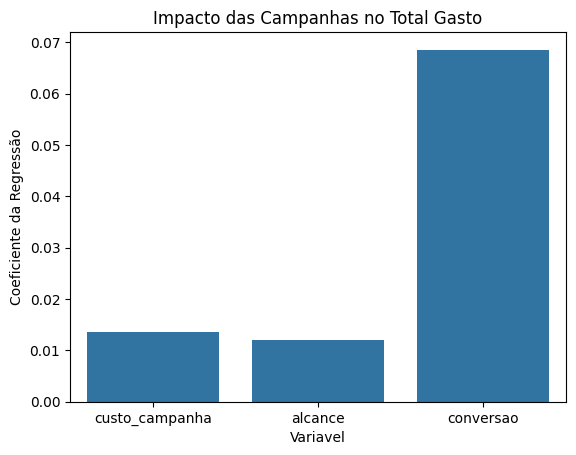


Coeficientes da Regressão Linear (Campanhas):
         Variavel  Coeficiente
2       conversao     0.068567
0  custo_campanha     0.013581
1         alcance     0.011968


In [44]:
# Junta os dados de transações com a tabela de campanhas, combinando pela coluna "campanha"
transacoes_reg = transacoes.merge(campanhas, left_on='campanha', right_on='nome_campanha', how='left')

# Define as variáveis independentes (features) que serão usadas para prever o total gasto
features = ['custo_campanha', 'alcance', 'conversao']
X = transacoes_reg[features]  # Variáveis explicativas
y = transacoes_reg['total_gasto']  # Variável alvo (o que queremos prever)

# Criação e treino do modelo de Regressão Linear
reg_model = LinearRegression()
reg_model.fit(X, y)  # Treina o modelo com base nos dados X e y

# Organiza os coeficientes em um DataFrame para visualização
coef_df = pd.DataFrame({
    'Variavel': features,
    'Coeficiente': reg_model.coef_  # Mostra o peso (impacto) de cada variável na previsão do gasto
})

# Visualiza os coeficientes como gráfico de barras
sns.barplot(data=coef_df, x='Variavel', y='Coeficiente')
plt.title('Impacto das Campanhas no Total Gasto')
plt.ylabel('Coeficiente da Regressão')
plt.show()

# Exibe os coeficientes ordenados por impacto
print("\nCoeficientes da Regressão Linear (Campanhas):")
print(coef_df.sort_values(by='Coeficiente', ascending=False))

**Estrategia**

Foco em conversão, não só alcance

A empresa deve priorizar campanhas com taxa de conversão alta, mesmo que tenham alcance menor.

Testar e otimizar criativos, CTA e segmentações

Elementos que influenciam diretamente a conversão devem ser o foco: anúncios mais relevantes, testes A/B e segmentações mais precisas.

Custo não é vilão — se converte, compensa

Mesmo campanhas mais caras valem a pena se tiverem boa conversão, pois o custo tem impacto positivo (embora pequeno) no gasto.


Coeficientes (Modelo Cliente): [ 5.81608885  0.02635769 11.39432026]


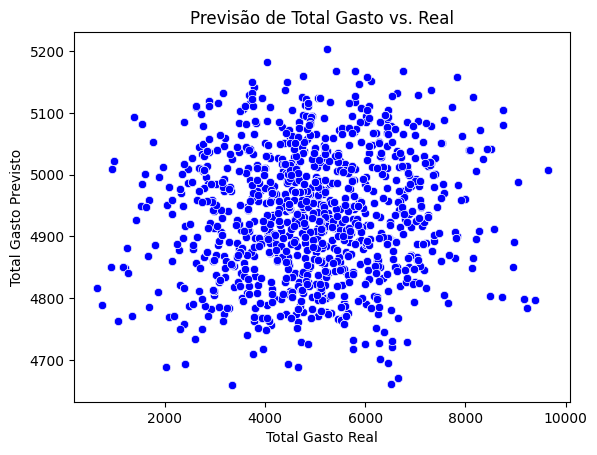

In [45]:
# Seleciona colunas relevantes do cliente para previsão e cria uma cópia segura
df = transacoes[['idade', 'renda_mensal', 'frequencia_compras', 'total_gasto']].copy()

# Renomeia 'renda_mensal' para 'renda_anual' (pode ser para adaptar algum padrão do modelo)
df = df.rename(columns={'renda_mensal': 'renda_anual'})

# Define variáveis independentes e a variável alvo
X_reg = df[["idade", "renda_anual", "frequencia_compras"]]
y_reg = df["total_gasto"]

# Cria e treina o modelo de regressão linear para prever o total gasto a partir do perfil do cliente
model = LinearRegression()
model.fit(X_reg, y_reg)

# Mostra os coeficientes (peso de cada variável) no modelo
print("\nCoeficientes (Modelo Cliente):", model.coef_)

# Adiciona ao DataFrame uma coluna com os valores previstos
df["total_gasto_previsto"] = model.predict(X_reg)

# Visualiza a comparação entre gasto real e gasto previsto
sns.scatterplot(x="total_gasto", y="total_gasto_previsto", data=df, color="blue")
plt.title("Previsão de Total Gasto vs. Real")
plt.xlabel("Total Gasto Real")
plt.ylabel("Total Gasto Previsto")
plt.show()

**Explicação do Resultado do Código**

Este código utiliza regressão linear para responder a duas perguntas: (1) quais atributos das campanhas mais influenciam o total gasto pelos clientes e (2) se é possível prever o total gasto com base no perfil do consumidor. Na primeira parte, o modelo é treinado com variáveis como custo da campanha, alcance e taxa de conversão. Os coeficientes obtidos indicam o impacto de cada um desses fatores sobre o gasto total: quanto maior o coeficiente, mais relevante é aquela variável. O gráfico ajuda a visualizar isso de forma clara. Na segunda parte, um novo modelo é criado considerando características dos clientes como idade, renda e frequência de compras. Com isso, o modelo estima o valor que o cliente tende a gastar. A visualização final compara os valores reais com os previstos, demonstrando a precisão do modelo. Essa abordagem é útil para entender o comportamento do consumidor e otimizar investimentos futuros em marketing.

**Apesar disso o resultado não foi muito claro **
Isso indica que o modelo não está capturando bem a variação real dos gastos dos clientes — a previsão fica muito próxima de uma média geral.

Visualmente, não há um padrão linear claro entre os valores previstos e reais (o ideal seria uma nuvem em linha reta ascendente)

# **Customer Lifetime Value**

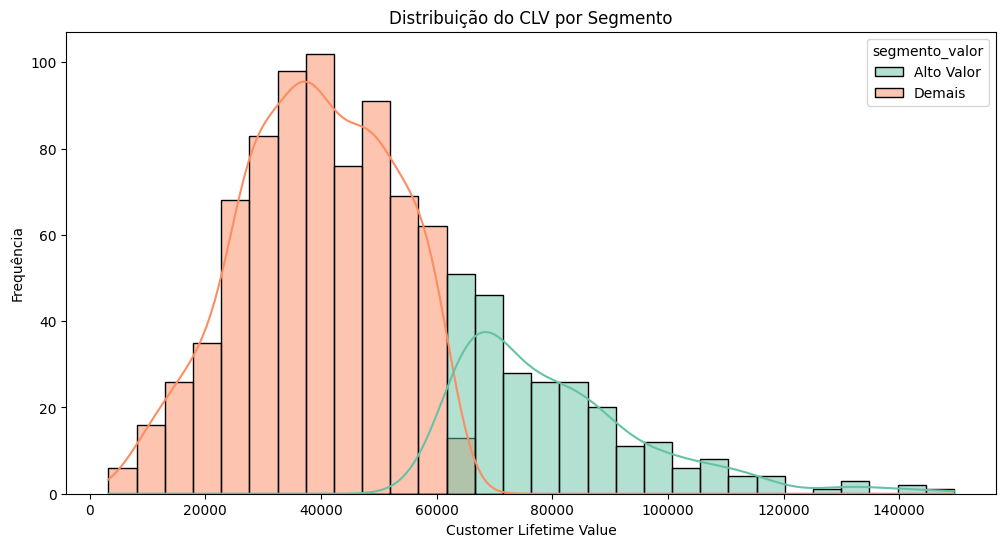

In [46]:
import matplotlib.pyplot as plt  # Biblioteca de visualização gráfica
import seaborn as sns  # Biblioteca complementar ao matplotlib com gráficos mais elaborados

# 1. Cálculo do CLV (Customer Lifetime Value) por cliente
clientes['clv'] = clientes['frequencia_compras'] * clientes['total_gasto']
# Multiplica o número de compras pela soma total gasta para estimar o valor de vida do cliente (CLV)

# 2. Identificação de clientes de alto valor (top 25% dos CLVs)
thresh_clv = clientes['clv'].quantile(0.75)
# Calcula o percentil 75 – ou seja, o valor de CLV que separa os 25% superiores dos demais

clientes['segmento_valor'] = clientes['clv'].apply(
    lambda x: 'Alto Valor' if x >= thresh_clv else 'Demais'
)
# Cria uma nova coluna classificando os clientes como 'Alto Valor' ou 'Demais' com base no CLV

# 3. Visualização gráfica da distribuição de CLV por segmento
plt.figure(figsize=(12, 6))
sns.histplot(
    data=clientes,
    x='clv',
    hue='segmento_valor',  # Usa cores diferentes para os segmentos
    bins=30,
    kde=True,  # Adiciona uma curva de densidade
    palette='Set2'
)
plt.title('Distribuição do CLV por Segmento')
plt.xlabel('Customer Lifetime Value')
plt.ylabel('Frequência')
plt.show()


**Alto impacto** Poucos clientes, alto impacto no faturamento	Fidelização, acesso VIP, pós-venda premium
**Demais**	Maior volume, menor valor unitário	Campanhas de up-sell/cross-sell e incentivo à frequência


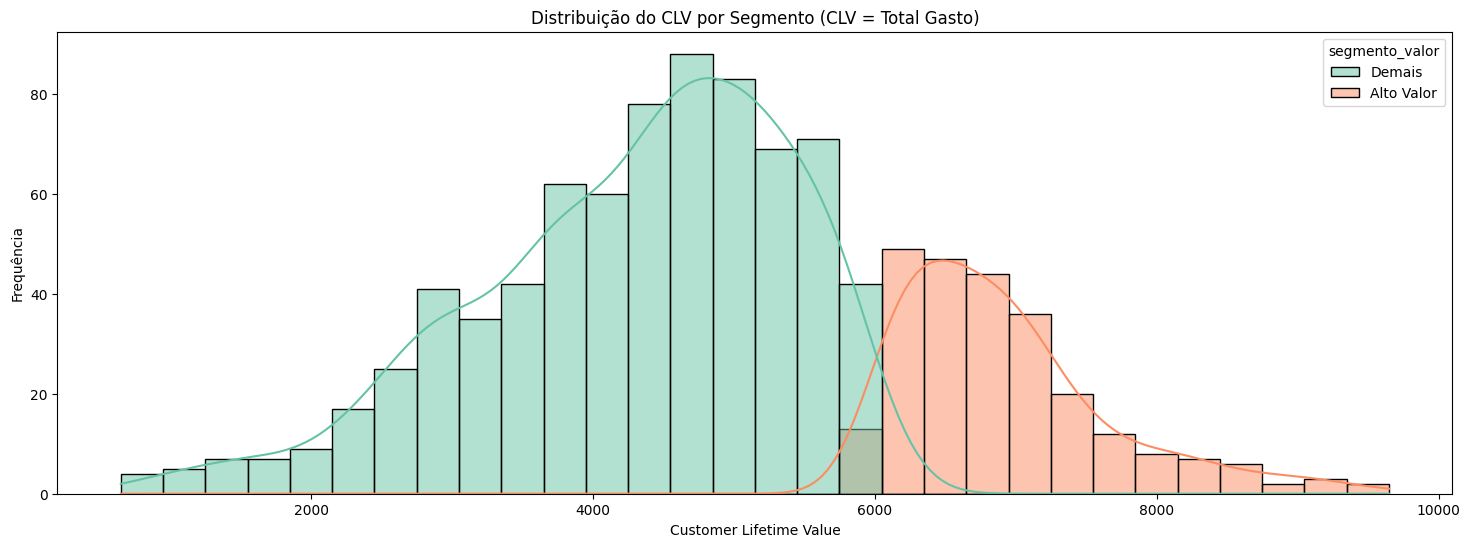

In [47]:
# Corrigindo o CLV com base apenas no total gasto
# Create or re-create the 'df' DataFrame
df = transacoes[['idade', 'renda_mensal', 'frequencia_compras', 'total_gasto']].copy()
df = df.rename(columns={'renda_mensal': 'renda_anual'})  # If this renaming was intended

df['clv'] = df['total_gasto']  # já representa o CLV


# Selecionando colunas únicas por cliente
# Instead of using df, use transacoes DataFrame to access 'cliente_id'
clientes_clv = transacoes[['cliente_id', 'total_gasto']].drop_duplicates() # selecting 'total_gasto' for clv calculation
clientes_clv.rename(columns={'total_gasto': 'clv'}, inplace=True) # Renaming the column to 'clv'

# Adicionando a coluna de 'segmento_valor'
thresh_clv = clientes_clv['clv'].quantile(0.75)  # Using the new DataFrame for quantile calculation
clientes_clv['segmento_valor'] = clientes_clv['clv'].apply(lambda x: 'Alto Valor' if x >= thresh_clv else 'Demais')

# Plotando o gráfico corrigido
plt.figure(figsize=(18, 6))
sns.histplot(data=clientes_clv, x='clv', hue='segmento_valor', bins=30, kde=True, palette='Set2') # Using the new DataFrame for plotting
plt.title('Distribuição do CLV por Segmento (CLV = Total Gasto)')
plt.xlabel('Customer Lifetime Value')
plt.ylabel('Frequência')
plt.show()


In [48]:
# Merge CLV data back into the transactions DataFrame
transacoes = pd.merge(transacoes, clientes_clv[['cliente_id', 'clv']], on='cliente_id', how='left')

# Exibir o head e o tail da tabela de transações atualizada com CLV
print("\nHead da tabela de transações (com CLV):")
print(transacoes.head())
print("\nTail da tabela de transações (com CLV):")
print(transacoes.tail())



Head da tabela de transações (com CLV):
   Unnamed: 0  transacao_id  cliente_id data_compra  valor_compra  \
0           0             1         398  2022-01-01           161   
1           1             2         583  2022-01-02           116   
2           2             3         726  2022-01-03           173   
3           3             4         435  2022-01-04           148   
4           4             5         577  2022-01-05            21   

  meio_pagamento        campanha  idade  renda_mensal          cidade  \
0         cartão    sem_campanha     42          6782       Fortaleza   
1         boleto    sem_campanha     40          4456       São Paulo   
2         cartão        dia_pais     56          4005        Salvador   
3         cartão  volta_as_aulas     25          5911    Porto Alegre   
4         cartão        dia_pais     48          5815  Belo Horizonte   

  tipo_cliente  ultima_compra  frequencia_compras  total_gasto  cluster   clv  
0    ocasional           

# **Conjoint Analysis (análise da preferência por campanhas) - aprimorado**

In [49]:

# Filtra as linhas onde o CLV é maior que 6000
transacoes_filtradas = transacoes[transacoes['clv'] > 6000]

# Exibe o head e o tail da nova tabela
print("\nHead da tabela de transações filtradas (CLV > 6000):")
print(transacoes_filtradas.head())
print("\nTail da tabela de transações filtradas (CLV > 6000):")
print(transacoes_filtradas.tail())



Head da tabela de transações filtradas (CLV > 6000):
   Unnamed: 0  transacao_id  cliente_id data_compra  valor_compra  \
3           3             4         435  2022-01-04           148   
4           4             5         577  2022-01-05            21   
5           5             6         221  2022-01-06           121   
6           6             7         308  2022-01-07           119   
8           8             9         798  2022-01-09           184   

  meio_pagamento        campanha  idade  renda_mensal          cidade  \
3         cartão  volta_as_aulas     25          5911    Porto Alegre   
4         cartão        dia_pais     48          5815  Belo Horizonte   
5         cartão    sem_campanha     56          3943       Fortaleza   
6         cartão        ano_novo     20          2508       Fortaleza   
8         cartão        ano_novo     64          4536       São Paulo   

  tipo_cliente  ultima_compra  frequencia_compras  total_gasto  cluster   clv  
3    frequen

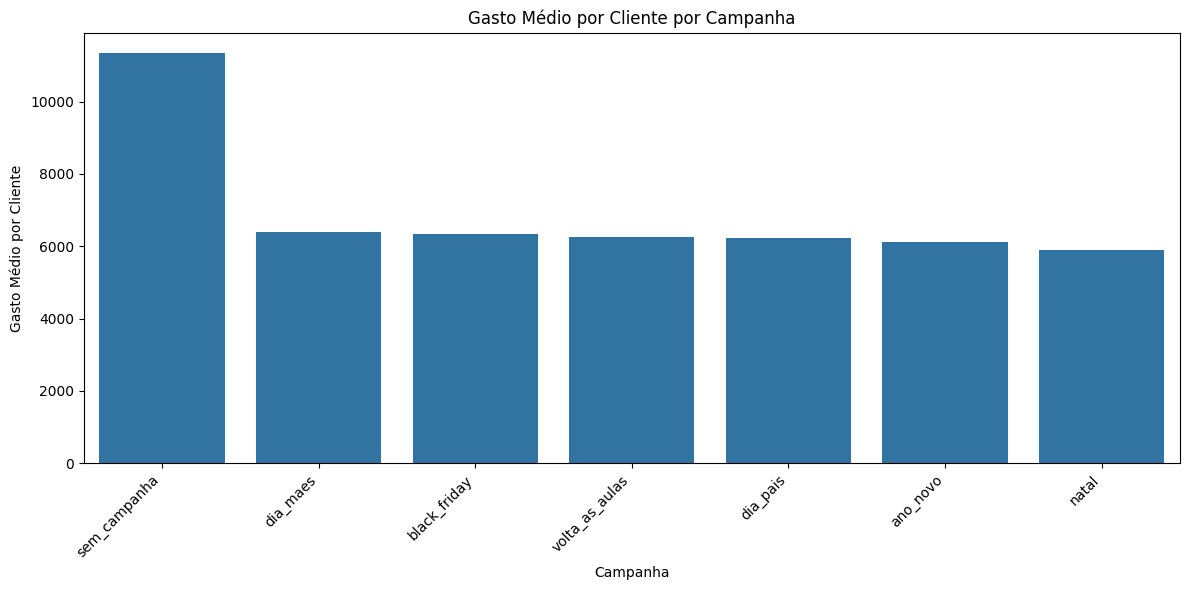


Gasto médio por cliente em cada campanha:
         campanha  gasto_medio_por_cliente  custo_campanha
5    sem_campanha             11335.494344           11792
2        dia_maes              6396.040816           12684
1    black_friday              6331.964824           16361
6  volta_as_aulas              6269.455307           13136
3        dia_pais              6239.864734           12198
0        ano_novo              6128.229219           11773
4           natal              5902.381546            9721


In [50]:
# Etapa: Conjoint Analysis (análise da preferência por campanhas) - aprimorado
# Agrupa por campanha e calcula o gasto total por cliente
gasto_por_cliente = transacoes.groupby(['campanha', 'cliente_id'])['total_gasto'].sum().reset_index()

# Calcula o gasto médio por cliente em cada campanha
gasto_medio_campanha = gasto_por_cliente.groupby('campanha')['total_gasto'].mean().reset_index()
gasto_medio_campanha = gasto_medio_campanha.rename(columns={'total_gasto': 'gasto_medio_por_cliente'})


# Junta os dados de custo da campanha
gasto_medio_campanha = pd.merge(gasto_medio_campanha, campanhas, left_on='campanha', right_on='nome_campanha', how='left')


# Ordena as campanhas pelo gasto médio por cliente
gasto_medio_campanha = gasto_medio_campanha.sort_values(by='gasto_medio_por_cliente', ascending=False)


# Visualização aprimorada
plt.figure(figsize=(12, 6))
sns.barplot(data=gasto_medio_campanha, x='campanha', y='gasto_medio_por_cliente')
plt.title('Gasto Médio por Cliente por Campanha')
plt.xlabel('Campanha')
plt.ylabel('Gasto Médio por Cliente')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()
plt.show()

# Exibe o DataFrame com os gastos médios por campanha
print("\nGasto médio por cliente em cada campanha:")
print(gasto_medio_campanha[['campanha', 'gasto_medio_por_cliente', 'custo_campanha']])




# **Cálculo do ROI para cada campanha**


Campanhas com maior ROI:
         campanha         roi
5    sem_campanha  848.777561
4           natal  242.478552
3        dia_pais  210.780948
0        ano_novo  205.651406
2        dia_maes  196.670136
6  volta_as_aulas  169.863657
1    black_friday  153.032272


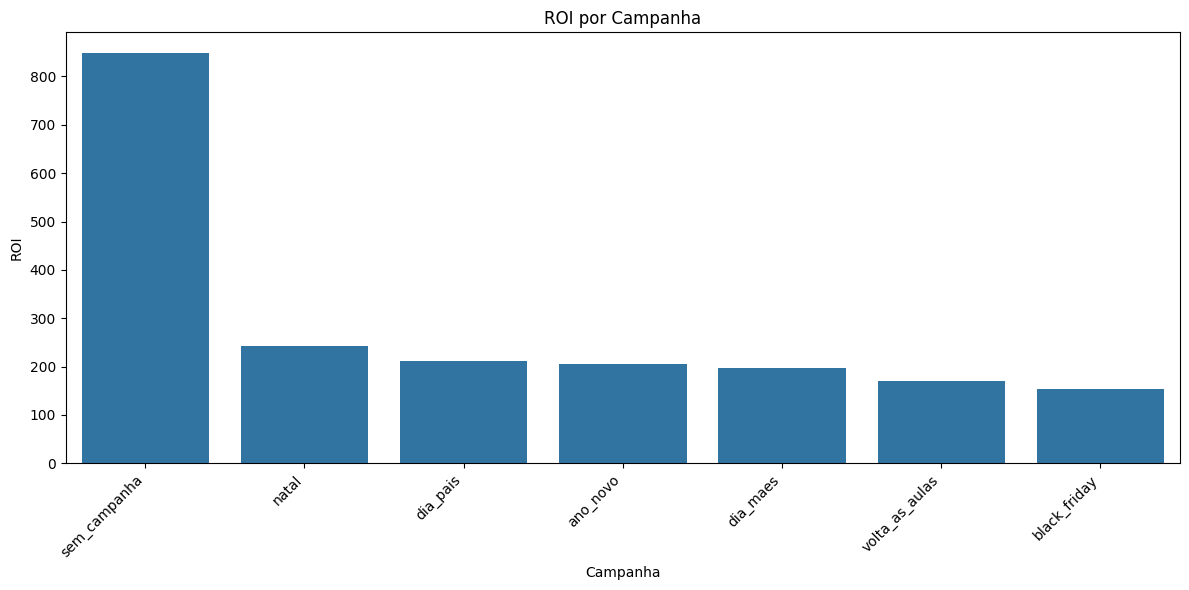

In [51]:
# Cálculo do ROI para cada campanha
preferencia_campanhas['roi'] = (preferencia_campanhas['total_gasto'] - preferencia_campanhas['custo_campanha']) / preferencia_campanhas['custo_campanha']

# Ordenando as campanhas pelo ROI
preferencia_campanhas_ordenado = preferencia_campanhas.sort_values(by='roi', ascending=False)

# Exibindo as campanhas com maior ROI
print("\nCampanhas com maior ROI:")
print(preferencia_campanhas_ordenado[['campanha', 'roi']])

# Visualização do ROI
plt.figure(figsize=(12, 6))
sns.barplot(data=preferencia_campanhas_ordenado, x='campanha', y='roi')
plt.title('ROI por Campanha')
plt.xlabel('Campanha')
plt.ylabel('ROI')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# **Regressão linear**

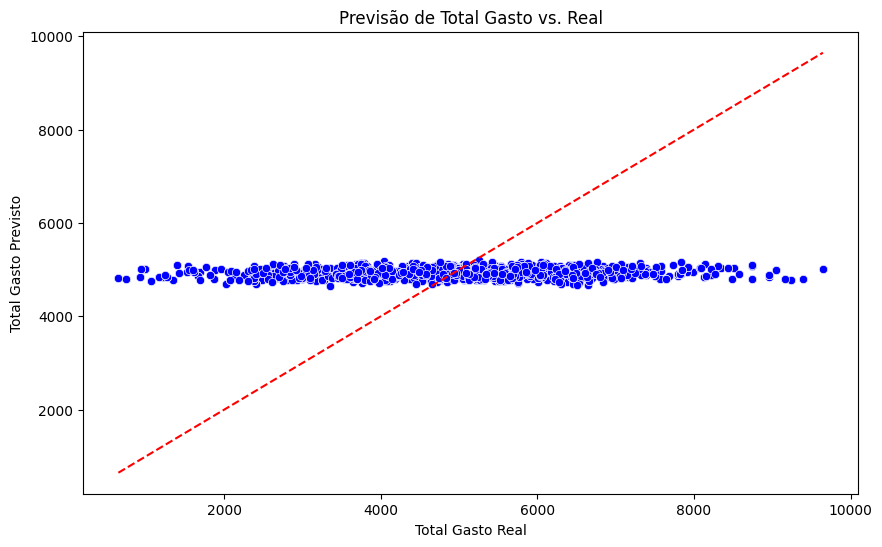


Análise da Previsão de Gastos:

Coeficientes do Modelo:
             Variavel  Coeficiente
0               idade     5.816089
1         renda_anual     0.026358
2  frequencia_compras    11.394320
- Aumentar idade pode levar a um aumento no gasto total dos clientes.
- Aumentar renda_anual pode levar a um aumento no gasto total dos clientes.
- Aumentar frequencia_compras pode levar a um aumento no gasto total dos clientes.

Sugestões Adicionais de Marketing:
- Segmentar clientes de alto valor (CLV > 6000) com ofertas personalizadas.
- Investir em campanhas com maior retorno sobre o investimento (ROI) identificado anteriormente.
- Oferecer incentivos direcionados aos clientes com baixa frequência de compra.
- Analisar a possibilidade de aumentar o valor das compras, visando o aumento do total gasto.


In [52]:

import pandas as pd
import matplotlib.pyplot as plt
# Criação do modelo de regressão linear para prever o total gasto com base nas características do cliente
X_reg = df[["idade", "renda_anual", "frequencia_compras"]]
y_reg = df["total_gasto"]
model = LinearRegression()
model.fit(X_reg, y_reg)

# Previsões
df["total_gasto_previsto"] = model.predict(X_reg)

# Gráfico de dispersão para comparar o total gasto real com o previsto
plt.figure(figsize=(10, 6))
sns.scatterplot(x="total_gasto", y="total_gasto_previsto", data=df, color="blue")
plt.title("Previsão de Total Gasto vs. Real")
plt.xlabel("Total Gasto Real")
plt.ylabel("Total Gasto Previsto")
plt.plot([min(df["total_gasto"]), max(df["total_gasto"])], [min(df["total_gasto"]), max(df["total_gasto"])], color='red', linestyle='--') # Linha de referência
plt.show()


# Análise e sugestões de marketing
print("\nAnálise da Previsão de Gastos:")

# Interpretação dos coeficientes
coef_df = pd.DataFrame({'Variavel': ["idade", "renda_anual", "frequencia_compras"], 'Coeficiente': model.coef_})
print("\nCoeficientes do Modelo:")
print(coef_df)

# Sugestões baseadas nos coeficientes:
for index, row in coef_df.iterrows():
    if row['Coeficiente'] > 0:
        print(f"- Aumentar {row['Variavel']} pode levar a um aumento no gasto total dos clientes.")
    elif row['Coeficiente'] < 0:
        print(f"- Reduzir {row['Variavel']} pode levar a um aumento no gasto total dos clientes. ")


# Sugestões adicionais baseadas na análise exploratória de dados anterior
print("\nSugestões Adicionais de Marketing:")
print("- Segmentar clientes de alto valor (CLV > 6000) com ofertas personalizadas.")
print("- Investir em campanhas com maior retorno sobre o investimento (ROI) identificado anteriormente.")
print("- Oferecer incentivos direcionados aos clientes com baixa frequência de compra.")
print("- Analisar a possibilidade de aumentar o valor das compras, visando o aumento do total gasto.")


# **Cidades**

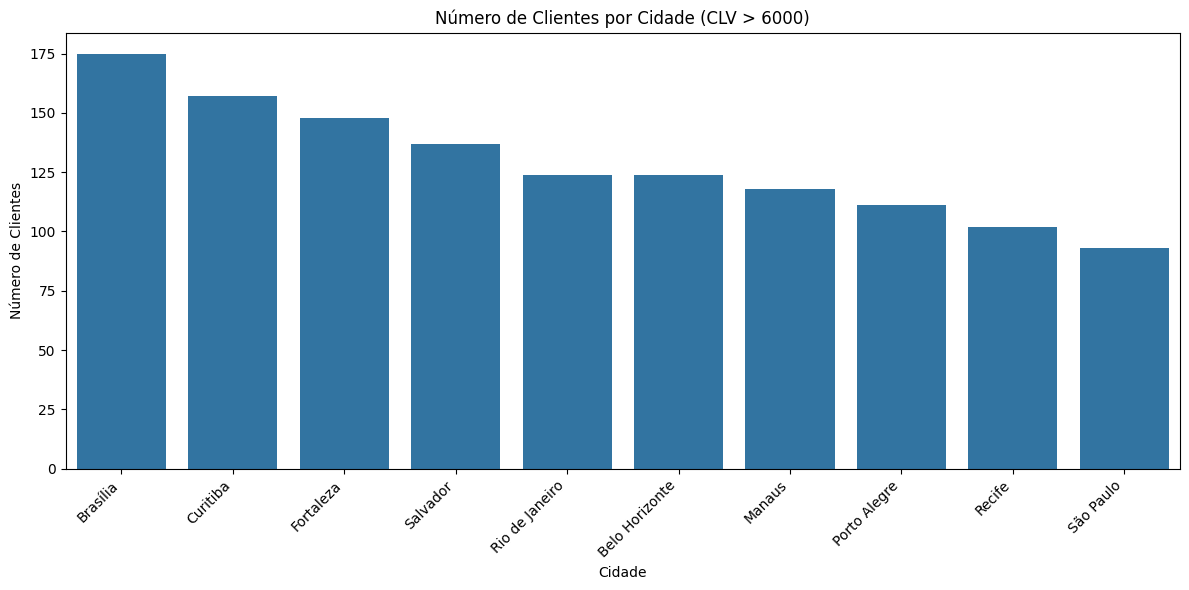

In [53]:
# Contagem de clientes por cidade na tabela 'transacoes_filtradas'
cidade_counts = transacoes_filtradas['cidade'].value_counts().reset_index()
cidade_counts.columns = ['cidade', 'clientes']

# Criação do gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x='cidade', y='clientes', data=cidade_counts)
plt.title('Número de Clientes por Cidade (CLV > 6000)')
plt.xlabel('Cidade')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# **Meios de pagamento**

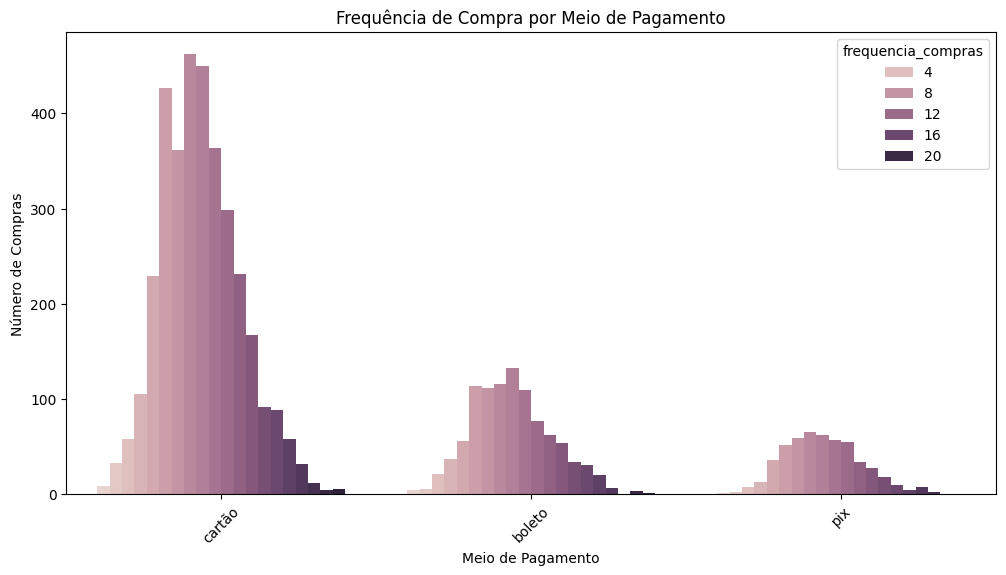

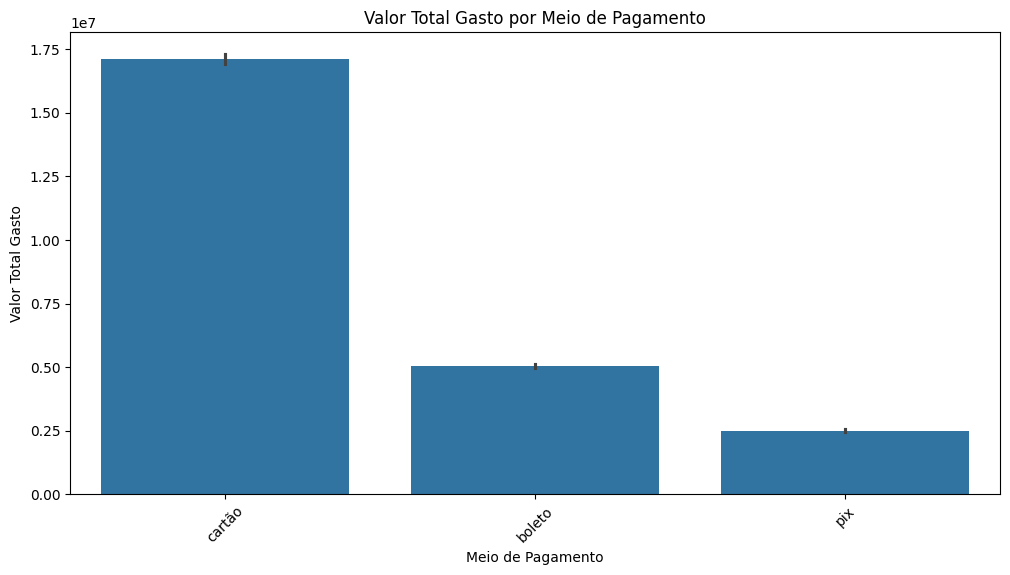

In [54]:
# Gráfico de barras relacionando meio de pagamento com frequência de compra
plt.figure(figsize=(12, 6))
sns.countplot(x='meio_pagamento', data=transacoes, hue='frequencia_compras') # Assumindo que 'meio_pagamento' e 'frequencia_compras' estão na sua tabela 'transacoes'
plt.title('Frequência de Compra por Meio de Pagamento')
plt.xlabel('Meio de Pagamento')
plt.ylabel('Número de Compras')
plt.xticks(rotation=45)
plt.show()

# Gráfico de barras relacionando meio de pagamento com o valor gasto
plt.figure(figsize=(12, 6))
sns.barplot(x='meio_pagamento', y='total_gasto', data=transacoes, estimator=sum) # estimator=sum para somar os gastos
plt.title('Valor Total Gasto por Meio de Pagamento')
plt.xlabel('Meio de Pagamento')
plt.ylabel('Valor Total Gasto')
plt.xticks(rotation=45)
plt.show()


**Sugestões com base na análise**

*   Ênfase nos estados Brasília, Curitiba e Fortaleza;
*   Investimento em campanhas de fim de ano;
*   Comunicações e ofertas especiais de CRM ao longo do ano com clientes com o CLV acima de 60000;
*   Ofertas para tipos de pagamento: para fomento de vendas descontos para pagamento no cartão;




